#### This file is used for elucidating the dataset, its contents and structure
##### Author: Rambod Azimi

Dataset Used: GTZAN Dataset - Music Genre Classification (MGC)

Dataset Link: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data

Content:

genres original - A collection of 10 genres with 100 audio files each, all having a length of 30 seconds --> Total of 1000 songs, 500 hours

images original - A visual representation for each audio file --> The audio files were converted to Mel Spectrograms

2 CSV files - Containing features of the audio files. One file has for each song (30 seconds long) a mean and variance computed over multiple features that can be extracted from an audio file. The other file has the same structure, but the songs were split before into 3 seconds audio files (this way increasing 10 times the amount of data we fuel into our classification models).

### Genres

1. Blues

2. Classical

3. Country

4. Disco

5. Hip Hop

6. Jazz

7. Metal

8. Pop

9. Reggae

10. Rock

The CSV file inside the dataset contains several features for each audio file, such as filename, label, length, rms, zero crossing rate, tempo, mfcc mean (20), mfcc variance (20).

All the values for the audio files have already been computed and saved into the CSV file. However, for convenience, I have implemented some of the important ones in case you want to use your own set of audio files rather the GTZAN dataset.

In [ ]:
# Importing required libraries
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

mfcc shape: (20, 1293)
mfcc mean [-113.59882, 121.57067, -19.162262, 42.36394, -6.362266, 18.621931, -13.699734, 15.339802, -12.274305, 10.970944, -8.32606, 8.802088, -3.6699412, 5.7446756, -5.162783, 0.7517064, -1.687854, -0.40873003, -2.3026767, 1.2224671]
mfcc variance [2569.3694, 295.8471, 235.58444, 151.03873, 167.99289, 89.17242, 67.60309, 69.001495, 82.21984, 63.346542, 61.76499, 51.280754, 41.215897, 40.51752, 49.784233, 52.424534, 36.535866, 41.60317, 55.053654, 46.94135]


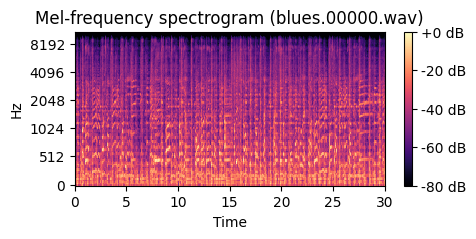

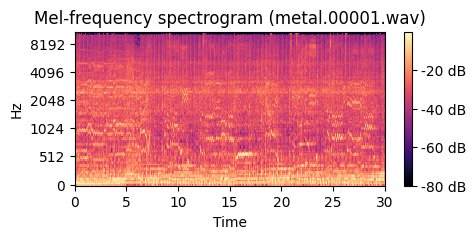

In [52]:
"""
This section calculates the Mel-frequency Cepstral Coefficients for an audio file,
Calculates mean and variance for each mfcc (20 in total),
and plots the Mel spectrogram of the audio file.
"""
# Load a sample audio file as a floating point time series
audio_time_series, sampling_rate = librosa.load("../Data/genres_original/blues/blues.00000.wav")
audio_time_series2, sampling_rate2 = librosa.load("../Data/genres_original/metal/metal.00001.wav")

# Apply Mel-frequency Cepstral Coefficients
mfcc_sequence = librosa.feature.mfcc(y=audio_time_series, sr=sampling_rate, n_mfcc=20)

print(f"mfcc shape: {mfcc_sequence.shape}")

mfcc_mean = []
mfcc_var = []
for i in range(20):
    mfcc_mean.append(np.mean(mfcc_sequence[i]))

for i in range(20):
    mfcc_var.append(np.var(mfcc_sequence[i]))

print("mfcc mean:", mfcc_mean)
print("mfcc variance:", mfcc_var)

# Compute Mel spectrogram
S = librosa.feature.melspectrogram(y=audio_time_series, sr=sampling_rate)

# Convert to decibel scale (log scale)
S_db = librosa.power_to_db(S, ref=np.max)

# Compute Mel spectrogram
S2 = librosa.feature.melspectrogram(y=audio_time_series2, sr=sampling_rate2)

# Convert to decibel scale (log scale)
S2_db = librosa.power_to_db(S2, ref=np.max)

# Display the spectrogram
plt.figure(figsize=(5, 2))
librosa.display.specshow(S_db, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram (blues.00000.wav)')
plt.show()

plt.figure(figsize=(5, 2))
librosa.display.specshow(S2_db, sr=sampling_rate2, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram (metal.00001.wav)')
plt.show()

In [62]:
"""
This section calculates several features of a given audio file such as:
Length
Tempo
RMS mean and variance
Zero Crossing Rate mean and variance
"""
# Calculating the length of an audio file
length = librosa.get_duration(y=audio_time_series, sr=sampling_rate)
print("Length:", length, "Seconds")

# Calculating the tempo of an audio file
tempo, _ = librosa.beat.beat_track(y=audio_time_series, sr=sampling_rate)
print("Tempo:", tempo, "BPM")

# Calculating RMS
rms = librosa.feature.rms(y=audio_time_series)
print("RMS shape:", rms.shape)
rms_mean = np.mean(rms)
rms_var = np.var(rms)
print("RMS mean:", rms_mean)
print("RMS variance:", rms_var)

# Calculating Zero Crossing Rate
zcr = librosa.feature.zero_crossing_rate(y=audio_time_series)
print("zero-crossing rate shape:", zcr.shape)
zcr_mean = np.mean(zcr)
zcr_var = np.var(zcr)
print("zero-crossing rate mean:", zcr_mean)
print("zero-crossing rate variance:", zcr_var)

Length: 30.013333333333332 Seconds
Tempo: 123.046875 BPM
RMS shape: (1, 1293)
RMS mean: 0.13018432
RMS variance: 0.00282838
zero-crossing rate shape: (1, 1293)
zero-crossing rate mean: 0.08304482066898686
zero-crossing rate variance: 0.0007669456545940504
